# 라이브러리 선언

일반 CPU 활용 시

In [1]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [2]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='0'

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 473352293686419224
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1443813785
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13814412184555593429
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


intel gpu 활용 시

In [3]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

In [5]:
### 실습. fashion_mnist 데이터를 활용하여 신경망구조를 생성하고 훈련시켜보세요
### keras.datasets.fashion_mnist.load_data()

In [6]:
import os
import cv2
# 케라스 모델 생성 라이브러리
from tensorflow import keras
from tensorflow.keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from tensorflow.keras import layers

# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from tensorflow.keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 데이터 불러오기

In [7]:
# 미리 섞여진 fashoin-mnist 의 학습 데이터와 테스트 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 1 Trouser


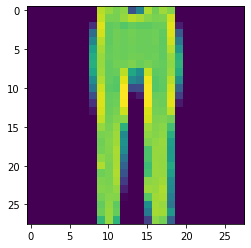

In [8]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습 셋과 테스트 셋의 데이터 개수
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9

# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 106

# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]
# 레이블 출력해 봅니다. 예를들어 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

# 2. 데이터 분리 및 정제

In [10]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
# # 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h,1 )
x_test = x_test.reshape(x_test.shape[0], w, h,1)

In [12]:
# 레이블에 원-핫 인코딩 적용 
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
y_train.shape

(60000, 10)

In [14]:
# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
# print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)
60000 train set
10000 test set


# 모델 생성 (CNN)

In [15]:
import warnings

warnings.filterwarnings(action="ignore")

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense
modelDim = x_train[0].shape
model = keras.Sequential()
# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Conv2D(filters=32, kernel_size=2, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=modelDim)) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

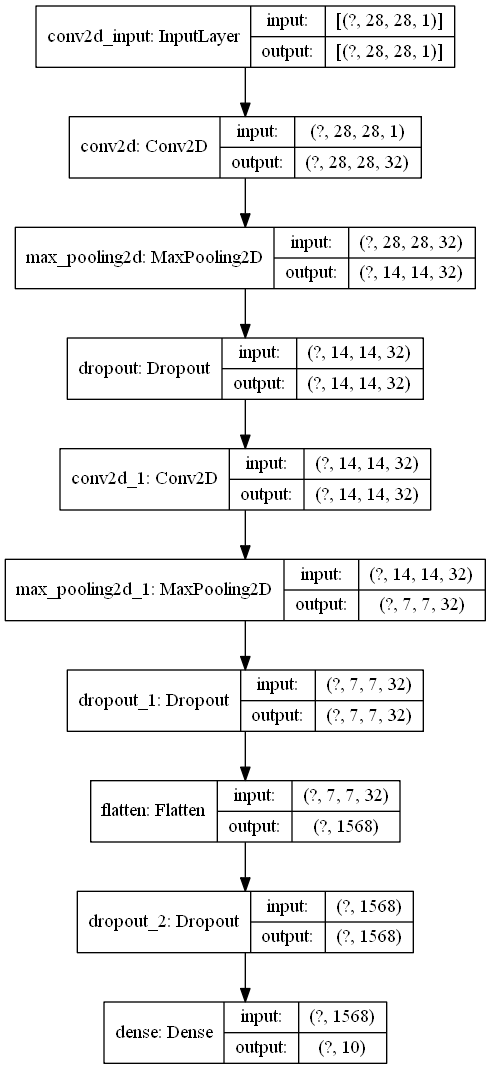

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 4. 모델 컴파일

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 5. 모델 훈련

In [21]:
import os
from datetime import datetime

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

datetime.now().strftime("%Y%m%d_%H%M%S")

logdir = os.path.join("logs_c", datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

callbacks = [
    
    TensorBoard(
    log_dir = logdir),
    
    EarlyStopping(monitor="val_loss", patience=10),
    
    ModelCheckpoint(filepath="model_mnist_weights.h5", 
                    monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
]

In [24]:
# 텐서를 CPU에 할당
# with tf.device('/GPU:0'):
history = model.fit(x_train,
                     y_train,
                     epochs=10,
                     batch_size=32,
                     shuffle=True,
                     callbacks=callbacks,
                     validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47808/48000 [============================>.] - ETA: 0s - loss: 1.4546 - accuracy: 0.4631
Epoch 00001: val_accuracy improved from -inf to 0.70458, saving model to model_mnist_weights.h5
48000/48000 [==============================] - 14s 298us/sample - loss: 1.4522 - accuracy: 0.4638 - val_loss: 0.8060 - val_accuracy: 0.7046
Epoch 2/10
47904/48000 [============================>.] - ETA: 0s - loss: 0.8716 - accuracy: 0.6671
Epoch 00002: val_accuracy improved from 0.70458 to 0.73175, saving model to model_mnist_weights.h5
48000/48000 [==============================] - 11s 231us/sample - loss: 0.8716 - accuracy: 0.6671 - val_loss: 0.7408 - val_accuracy: 0.7318
Epoch 3/10
47776/48000 [============================>.] - ETA: 0s - loss: 0.8324 - accuracy: 0.6850
Epoch 00003: val_accuracy improved from 0.73175 to 0.74458, saving model to model_mnist_weights.h5
48000/48000 [==============================] - 11s 226us/sample - loss: 0.83

# 6. 모델 추론

In [25]:
# verbose: 정보표시 레벨 (0,1)
test_loss, test_acc = model.evaluate(x_test, 
                                     y_test,
                                     verbose=1)
print(test_loss, test_acc)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# 7. 모델 예측

array([[1.5658823e-01, 4.7871321e-02, 2.3288585e-02, 5.6981134e-01,
        5.8506910e-02, 2.1489699e-07, 1.4261244e-01, 9.2885536e-08,
        1.3204160e-03, 5.1792864e-07]], dtype=float32)

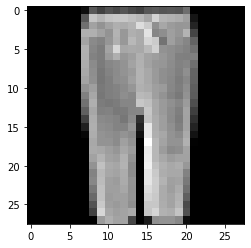

In [26]:
# 테스트데이터 1개 추출
testImg = x_test[190]
# 테스트데이터 1개 답지 확인 (바지)
y_test[190]

# 테스트데이터 이미지로 변환
testImg2 = testImg * 255
testimg3 = testImg2.reshape(28,28)
plt.imshow(testimg3, cmap="gray")

# 데이터 정제작업 수행
testimg4 = testimg3/255
testimg5 = testimg4.reshape(1,28,28,1)

# 예측 수행
test_predictions = model.predict(testimg5)
test_predictions


In [33]:
fashion_mnist_labels[np.argmax(test_predictions)]

'Dress'

### [실습] 결과 시각화

### [실습] 심화 응용 따라하기 하단의 cnn 따라하기 내용을 실습한 후 결과를 도출 후 haiteam@kopo.ac.kr 메일로 전송

In [66]:
def plot_data(X, Y, num_figures): 
    plt.figure(figsize=(30, 20)) 
    for i in range(num_figures): 
        plt.subplot(2, num_figures, i+1) 
        plt.imshow(X[i]) 
        contents = fashion_mnist_labels[np.argmax(Y[i])]
        plt.title(contents, fontsize=30) 
        plt.tight_layout()

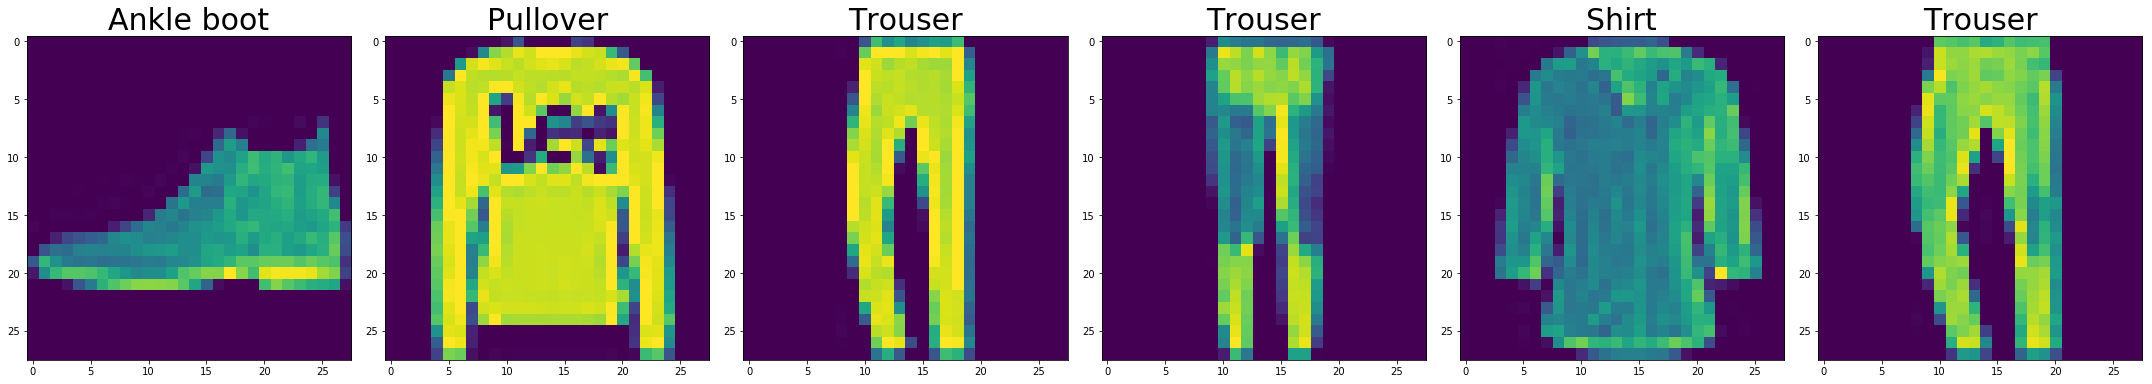

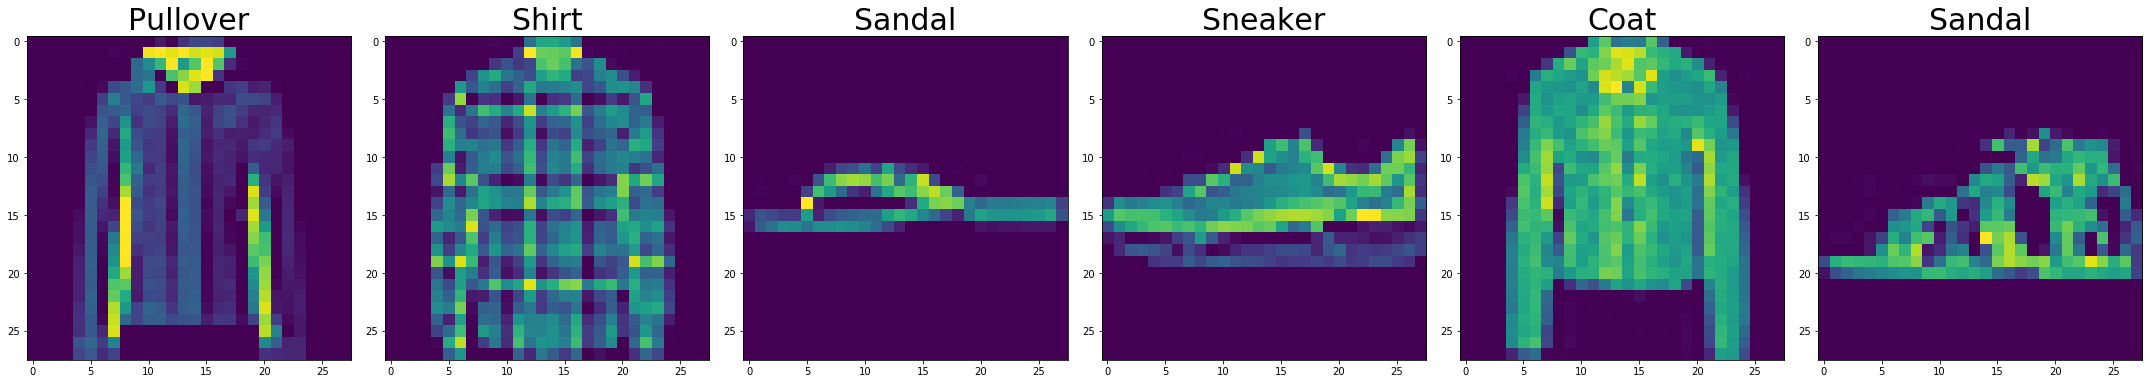

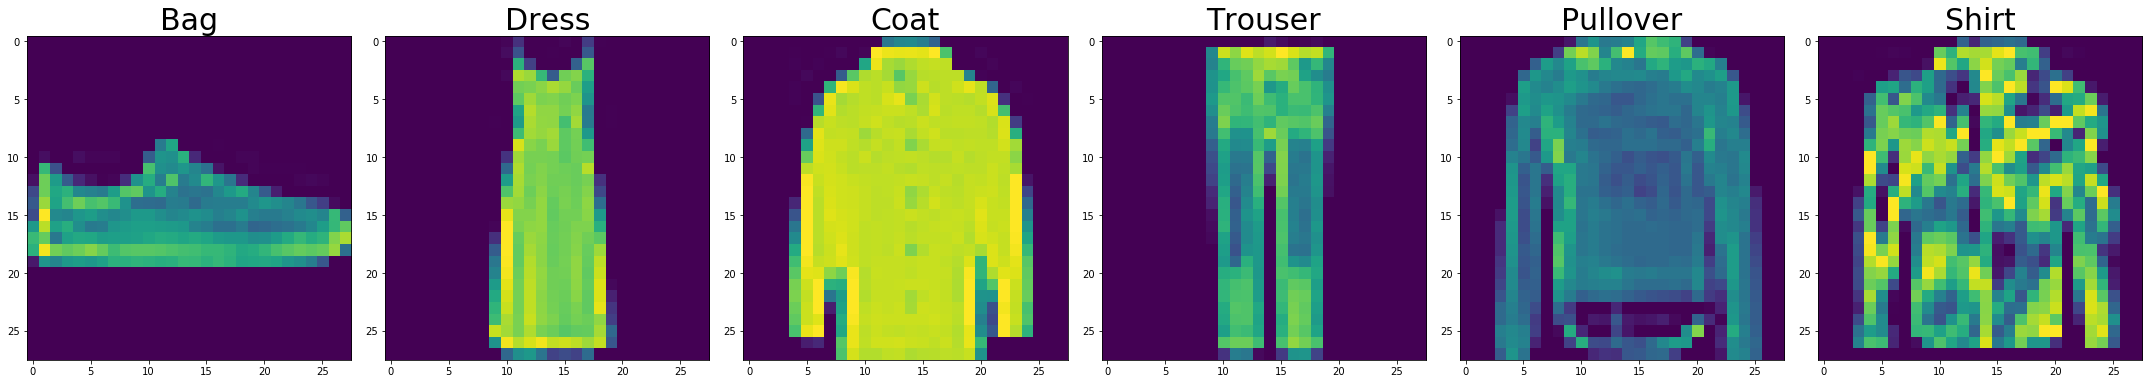

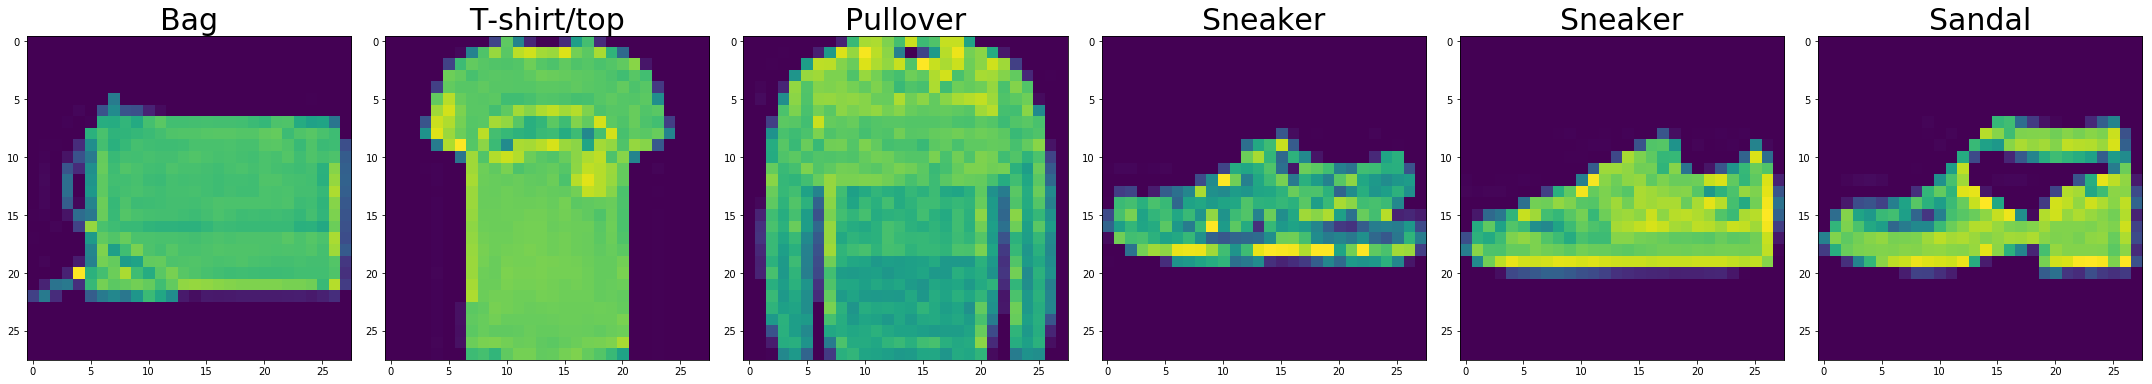

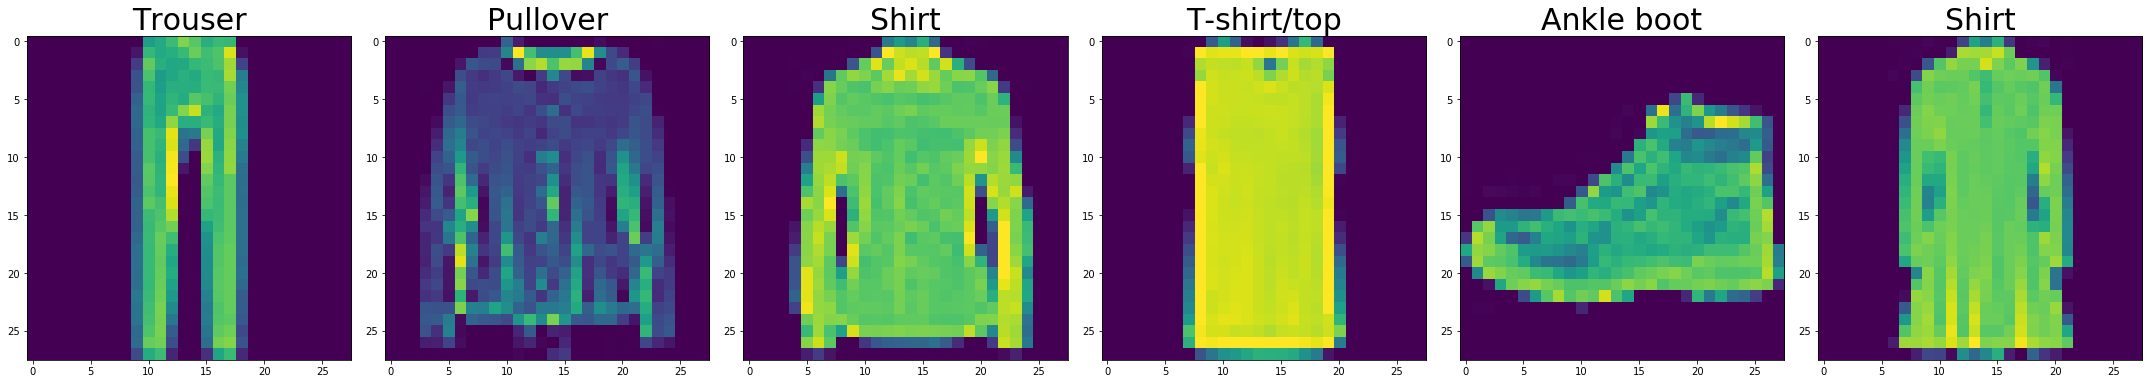

In [65]:
for i in range(0, 30, 6): 
    plot_data(inverse_test[i:], test_predictions[i:], 6)